# Dropping an indicator variable from a model does not remove the observations from the analysis

### Lets start with some packages and config

In [28]:
install.packages("tidyverse")
require(tidyverse)

options(repr.plot.width=20, repr.plot.height=10)
theme <- theme(
        axis.text=element_text(size = rel(2)),
        axis.title=element_text(size = rel(2)),
        plot.title=element_text(size = rel(3))
    )
points <- geom_point(size=3)


The downloaded binary packages are in
	/var/folders/tz/875z4smn2sz0kndfn6lyfvf40000gn/T//RtmpRty2VD/downloaded_packages


### Now lets build our dataset

y,x,manufacture,da,db
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
3.4,2.3,A,1,0
3.8,3.0,A,1,0
3.5,2.9,B,0,1
3.9,3.8,B,0,1
3.5,2.3,C,0,0
3.9,3.2,C,0,0


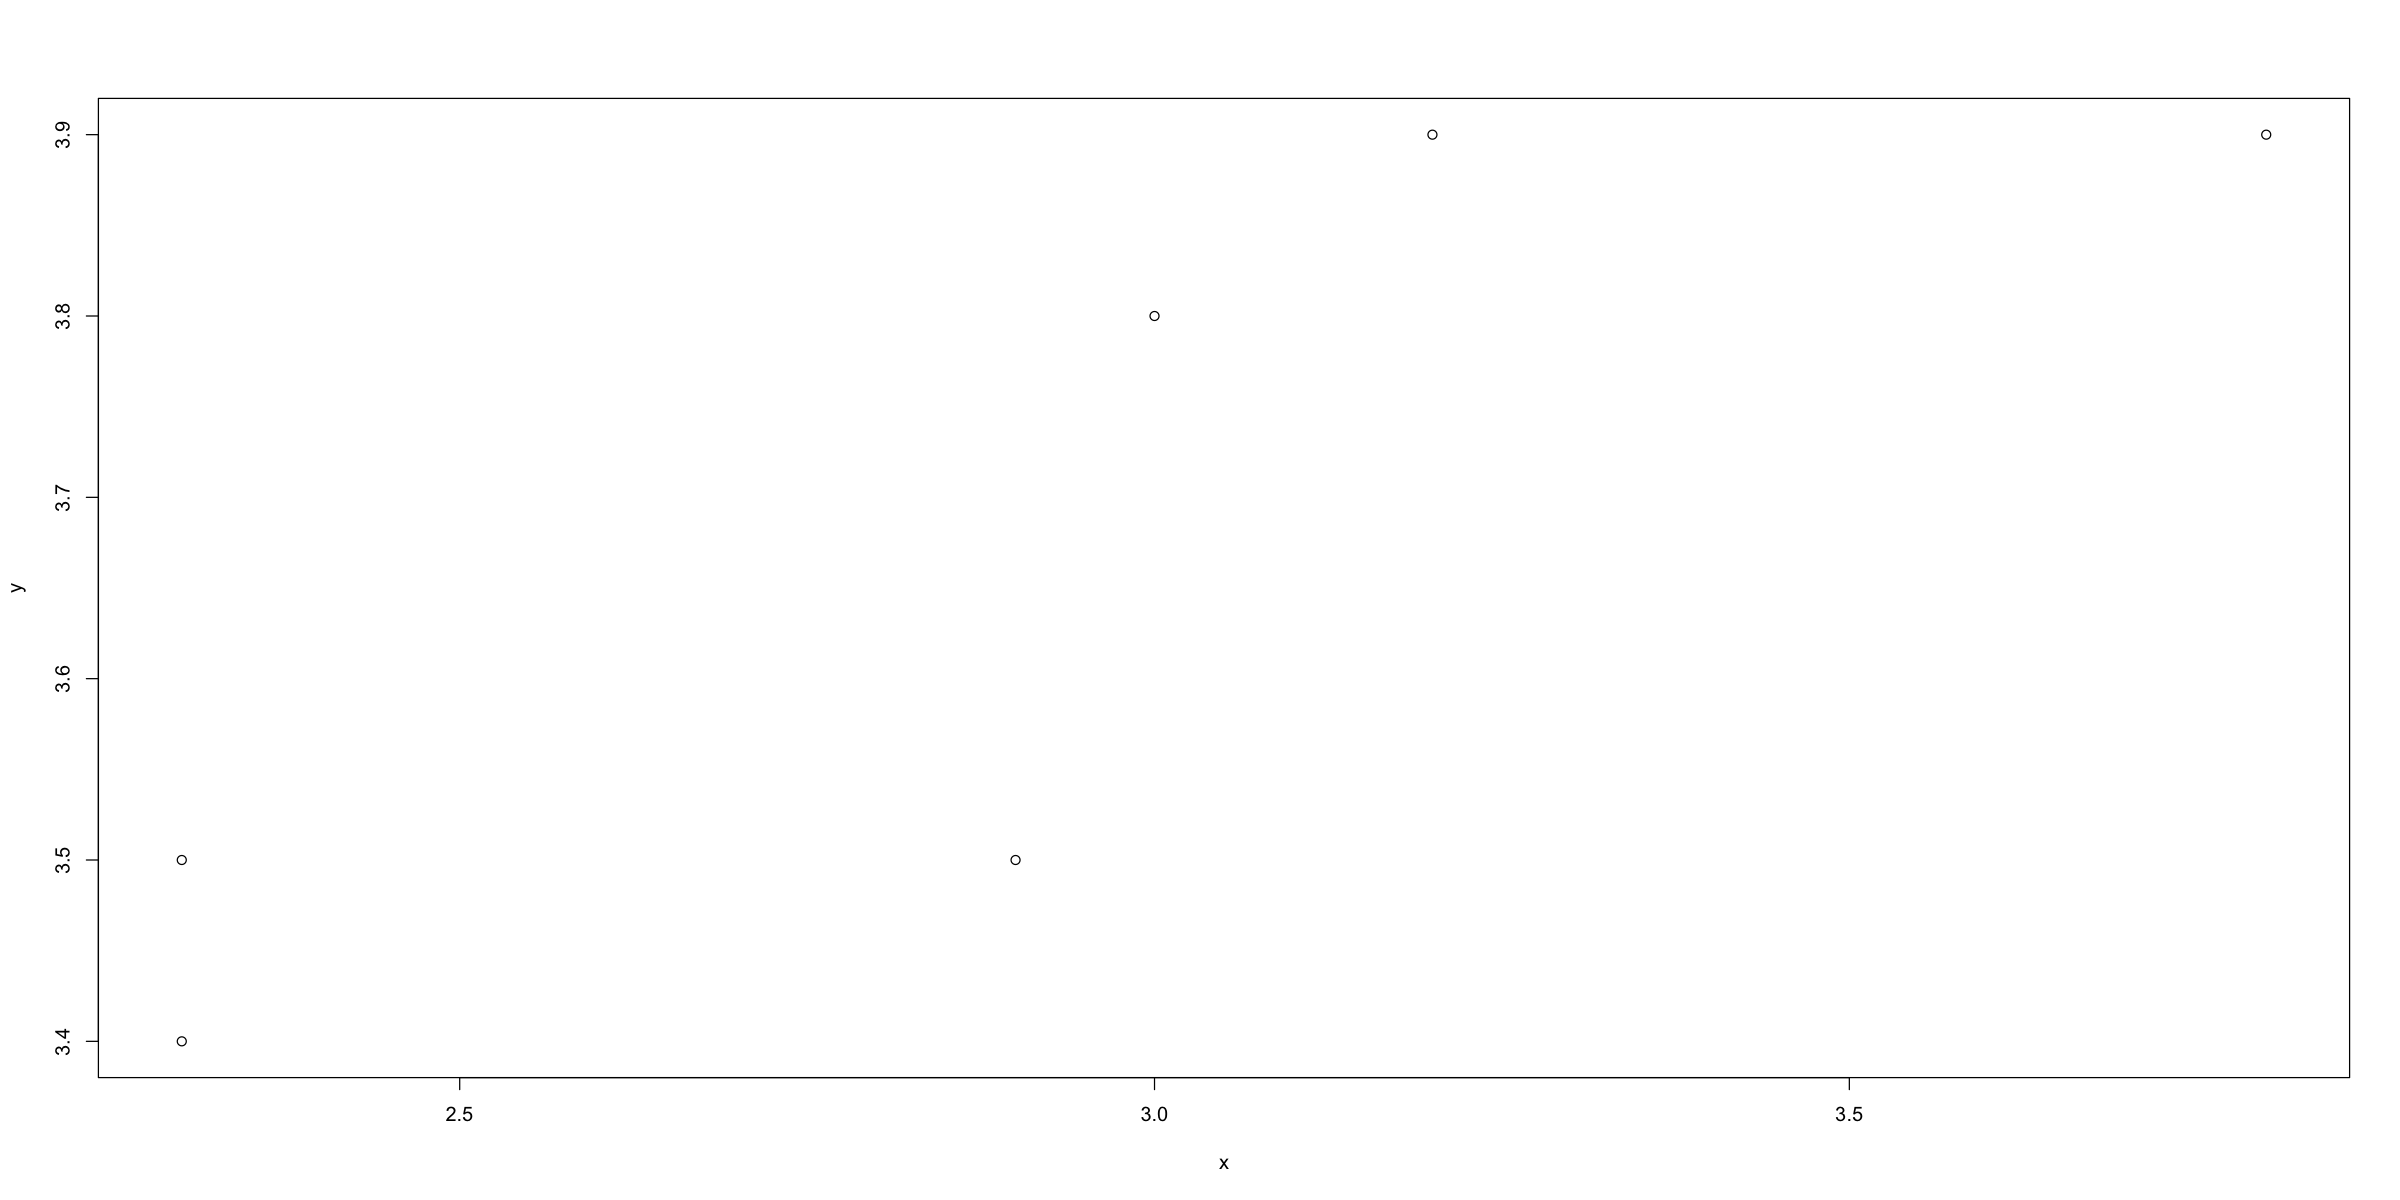

In [33]:
y <- c(3.4, 3.8, 3.5, 3.9, 3.5, 3.9)
x <- c( 2.3, 3.0, 2.9, 3.8, 2.3, 3.2)
manufacture <- c('A','A','B','B','C','C')
da <- c(1,1,0,0,0,0)
db <- c(0,0,1,1,0,0) 

sample.data <- data.frame(y, x, manufacture, da, db)

sample.data
plot(y~x, sample.data)

### Lets model and graph Y=X,Da,Db

In [90]:
sample.model <- lm(y~x+da+db, sample.data)
summary(sample.model)


Call:
lm(formula = y ~ x + da + db, data = sample.data)

Residuals:
       1        2        3        4        5        6 
-0.03412  0.03412  0.01327 -0.01327  0.01327 -0.01327 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.39668    0.10784  22.224  0.00202 **
x            0.47393    0.03791  12.500  0.00634 **
da          -0.05261    0.03913  -1.344  0.31098   
db          -0.28436    0.04510  -6.305  0.02424 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03894 on 2 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.9701 
F-statistic: 55.01 on 3 and 2 DF,  p-value: 0.01791


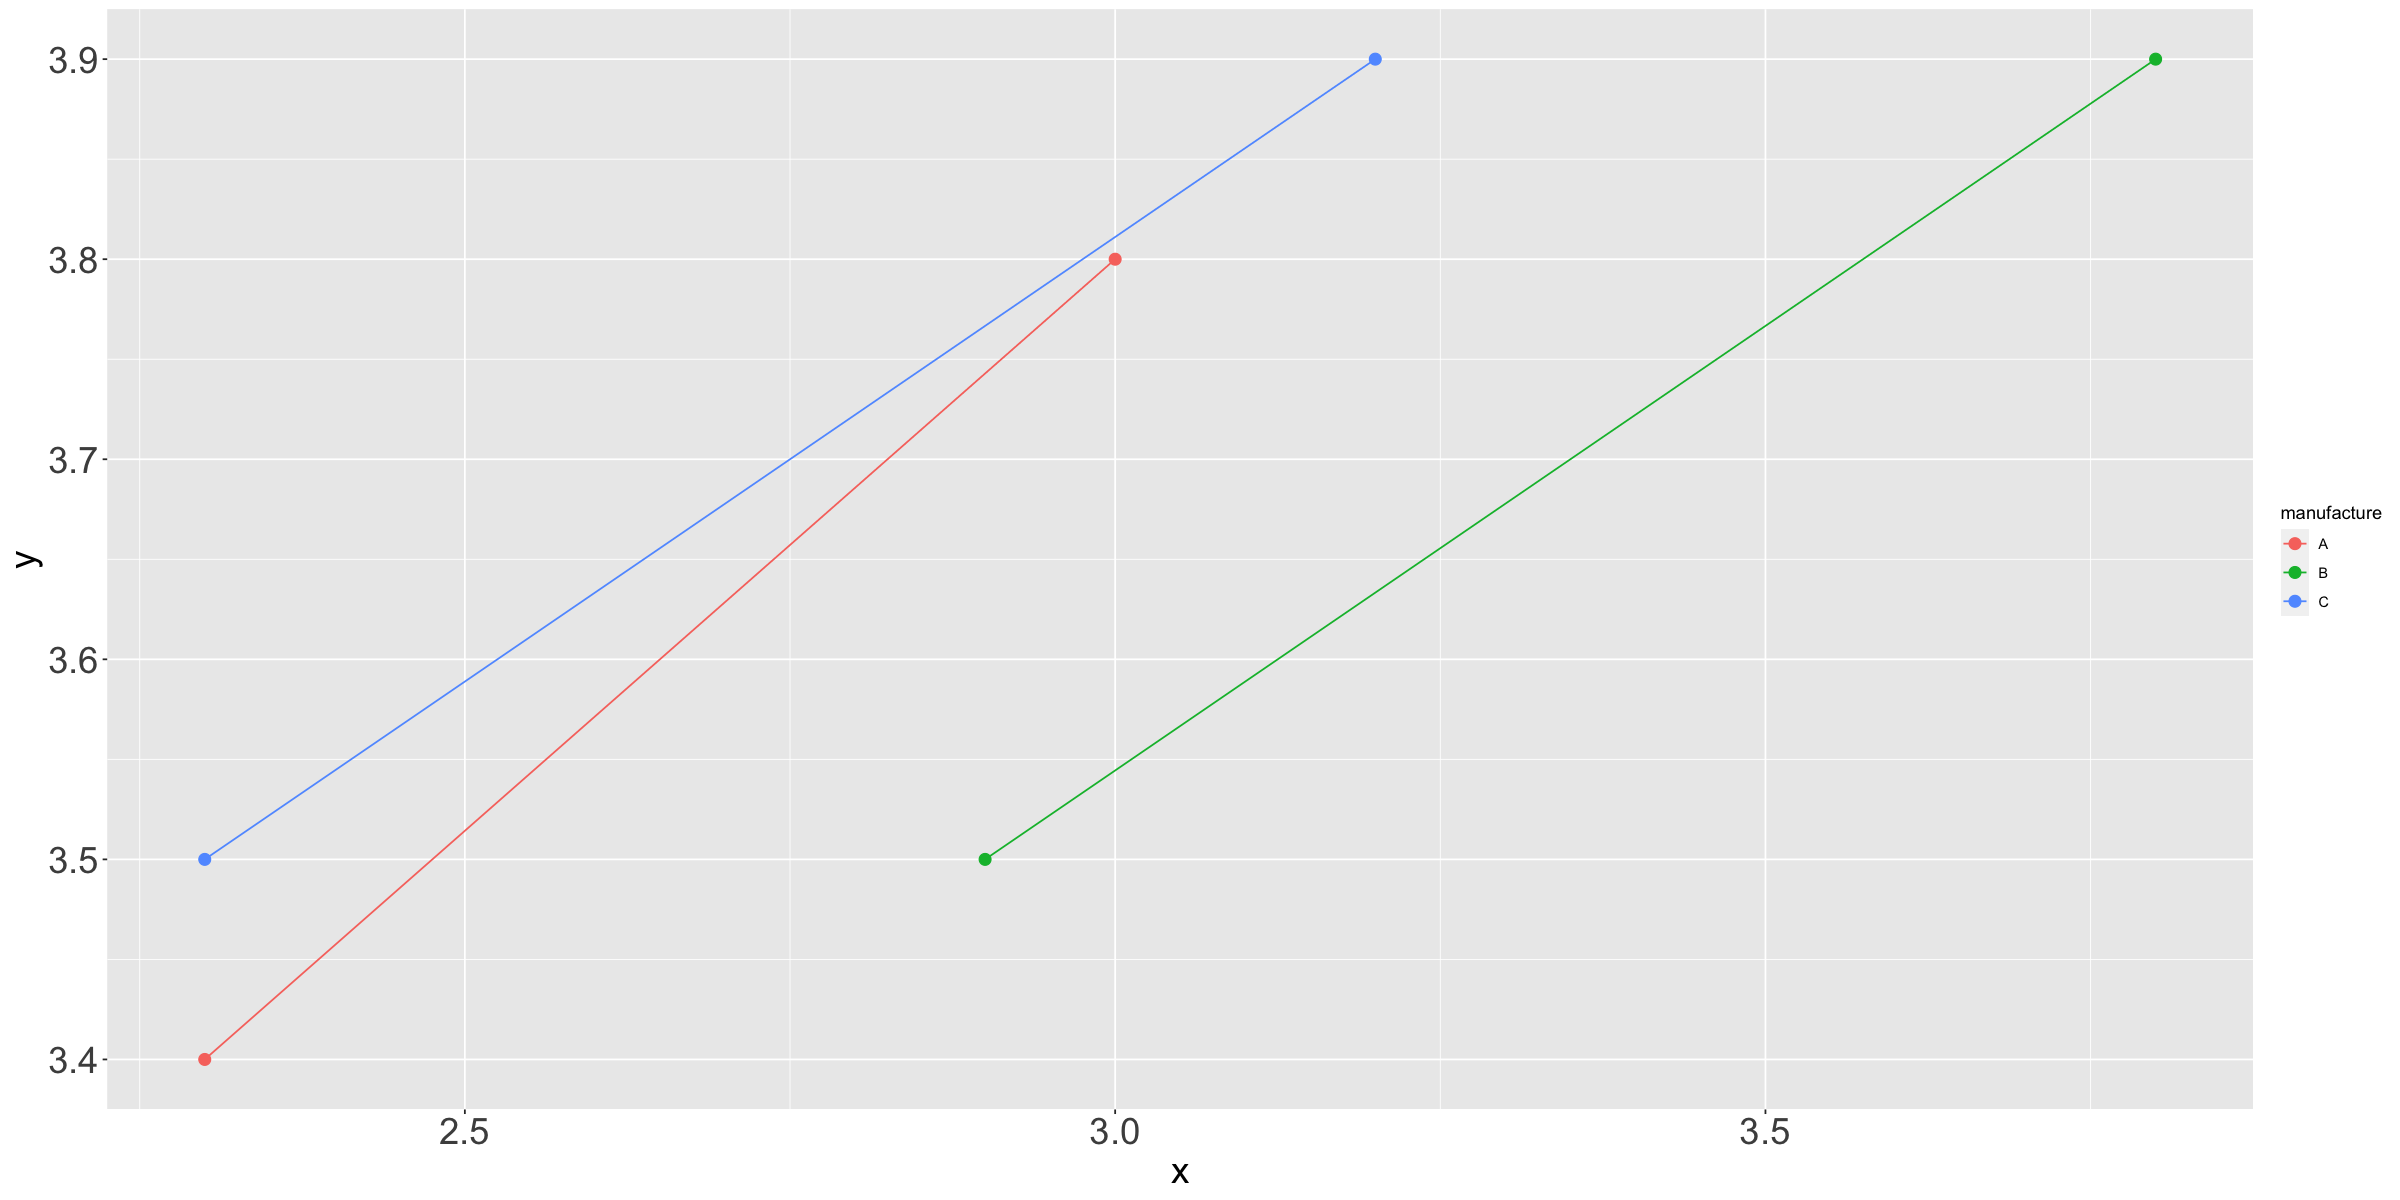

In [80]:
predicted1 = predict(sample.model, interval = "confidence")
fortifySample1 = fortify(sample.model)
modSample1 <- cbind(sample.data, predicted1)
    
ggplot(modSample1, aes(x=x, y=y, group=manufacture, fill=manufacture, colour=manufacture)) + 
    geom_line(linetype="solid") +
    theme + points

## Da is not a statistically significant factor we can see from the P-Value
So lets remove it.

## But the question is: can we just drop the non significant level of the qualitative factor from our model?
*The answer is yes! - of course we can do whatever we want with our model.*

But more importantly the observations from that factor wont be removed, they will just be added to the reference, in this case Dc, and these two levels will become confounded. 

In [87]:
sample.model2 <- lm(y~x+db, sample.data)
summary(sample.model2)


Call:
lm(formula = y ~ x + da, data = sample.data)

Residuals:
       1        2        3        4        5        6 
-0.07633  0.07633 -0.14700 -0.06502  0.06502  0.14700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.62226    0.37953   6.909  0.00621 **
x            0.35336    0.12213   2.893  0.06285 . 
da           0.04134    0.13497   0.306  0.77940   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1453 on 3 degrees of freedom
Multiple R-squared:   0.75,	Adjusted R-squared:  0.5834 
F-statistic: 4.501 on 2 and 3 DF,  p-value: 0.125


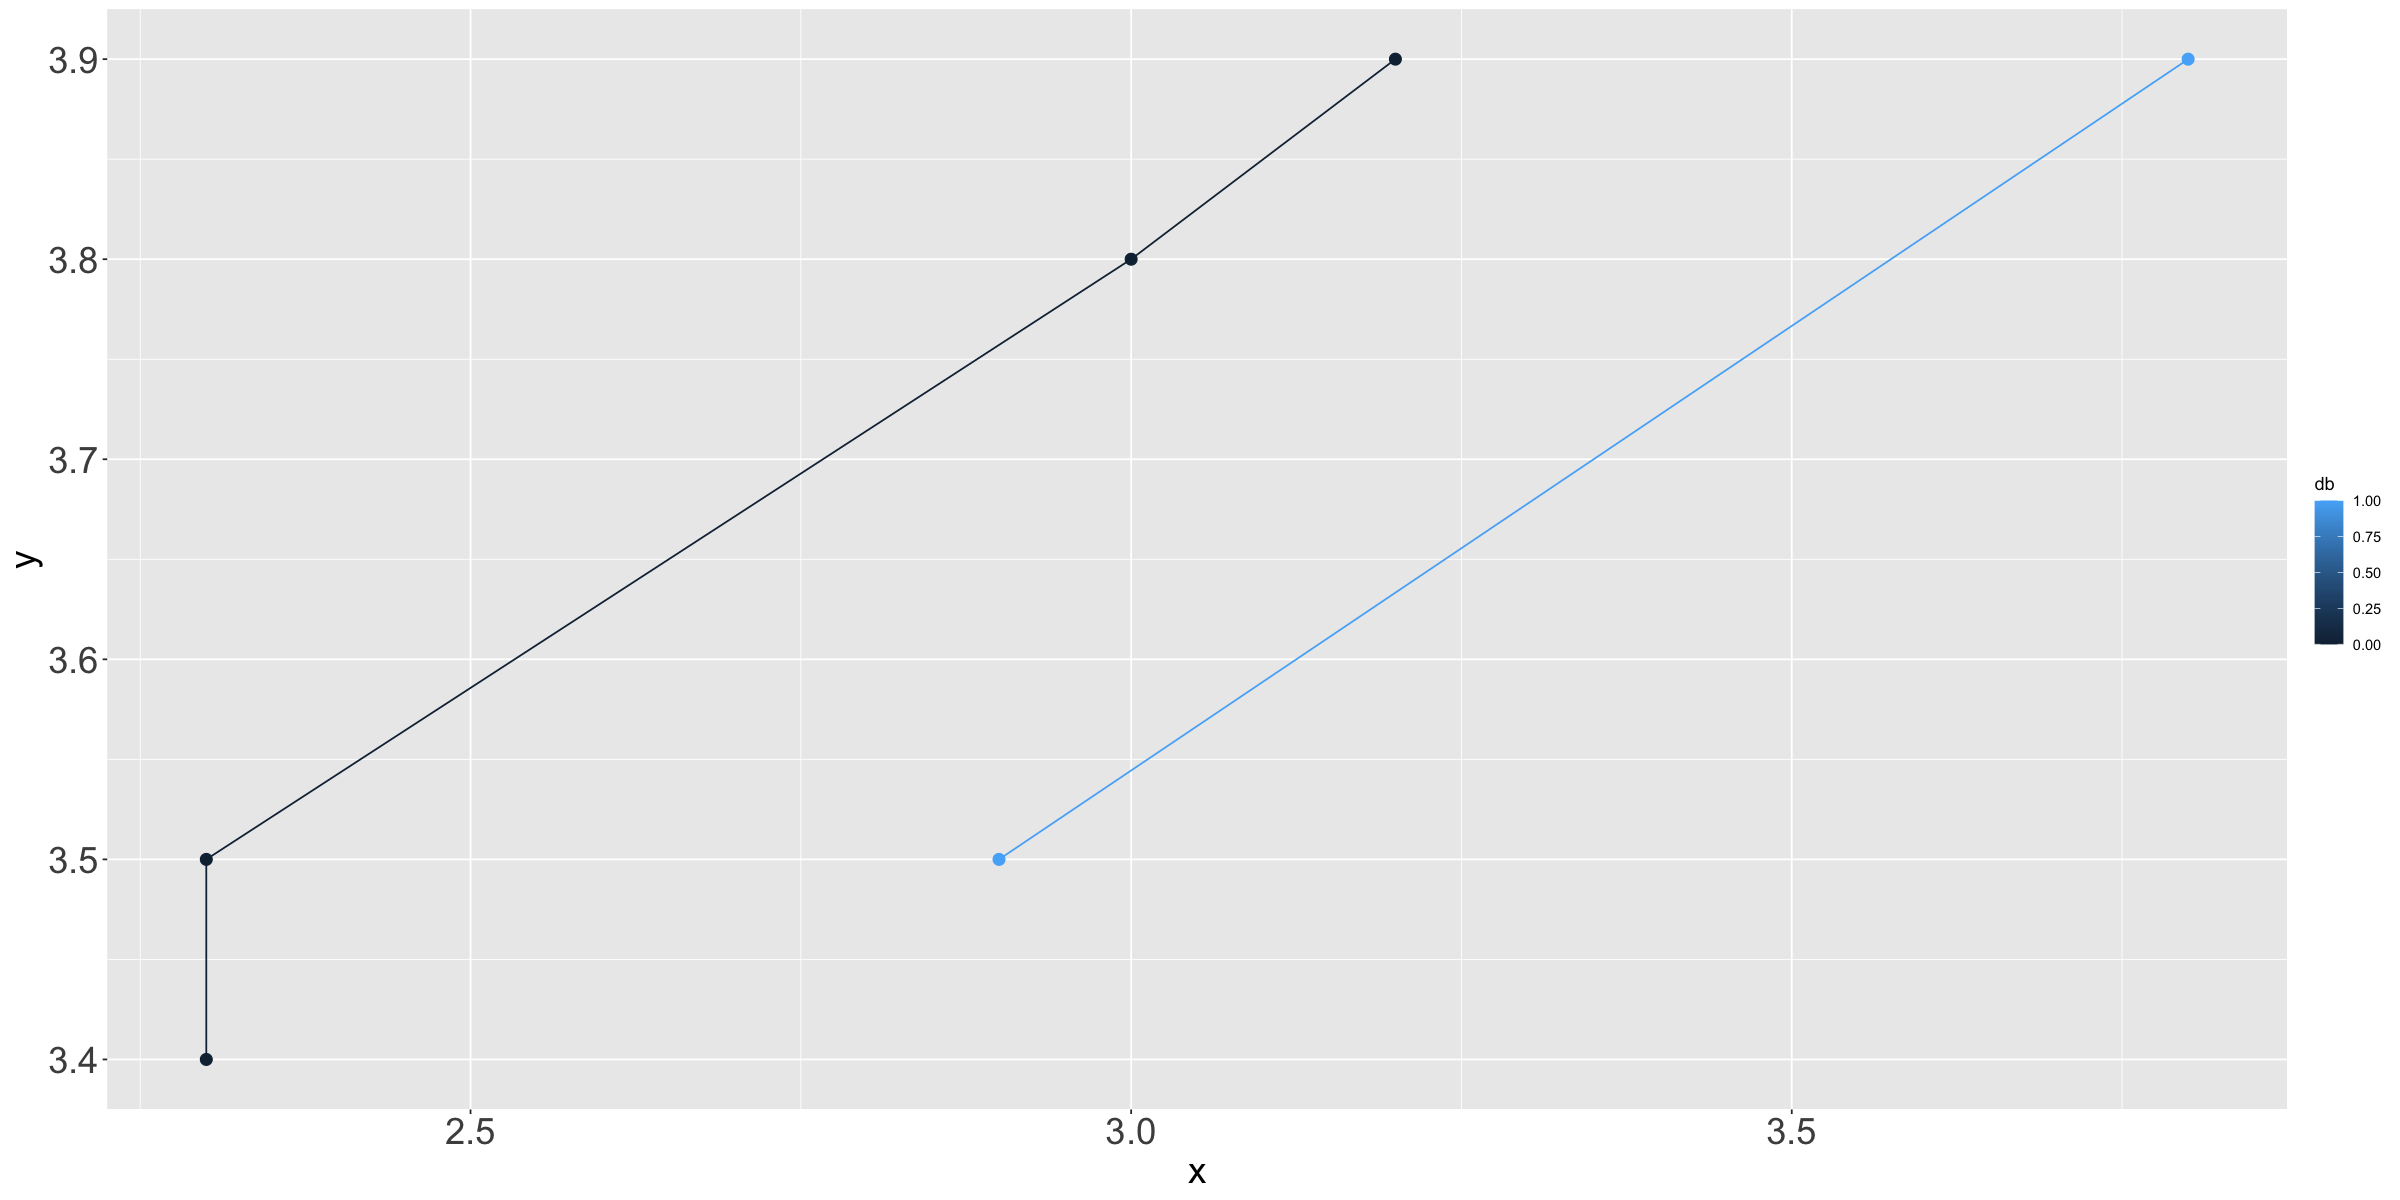

In [92]:
predicted2 = predict(sample.model2, interval = "confidence")
fortifySample2 = fortify(sample.model2)
modSample2 <- cbind(sample.data, predicted2)
    
ggplot(modSample1, aes(x=x, y=y, group=db, fill=db, colour=db)) + 
    geom_line(linetype="solid") +
    theme + points

### Now we can see Da & Dc have merged into one group, and Db is seperate, we can also reprenet this in the following equation.

In [102]:
a <- 2.62226 + 0.35336*3 + 0.04134*(0)
b <- 2.62226 + 0.35336*3 + 0.04134*(1)
c <- 2.62226 + 0.35336*3 + 0.04134*(0)

a
b
c

[1] 3.68234

[1] 3.72368

[1] 3.68234